# AI hub 지능형 스마트팜 통합 데이터(토마토)

- https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100

# RNN

https://studying-modory.tistory.com/entry/210311-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%8B%9C%EA%B3%84%EC%97%B4-RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten,Input, concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow.keras.utils as utils

from datetime import datetime
# import cv2
import glob
import zipfile
import os
import shutil

from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

import matplotlib as mlp
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)
mlp.rcParams["axes.unicode_minus"] = False

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

# 1. DATA 준비

## tomato 이미지 라벨링 json -> df
## bb정보 제외한 모든 데이터 csv

In [42]:
df_0 = pd.read_csv("C:/juna27/PythonWork/AI/data/tomato_label/tomato_df/tomato_final_df.csv", encoding="utf-8")
df_0

,imagePath,imageHeight,imageWidth,fileVersion,farmId,week,number,type,flowerCluster,date,...,numberOfLeaves,leafLength,leafWidth,floweringNode,numberOfTheFlower,numberOfTheFlowerPerTruss,numberOfFruitPerPlant,numberOfFruitPerTruss,fruitingNode,numberOfTheFlowerFullyDeveloped
0,V001_tom1_39_001_a1_00_20210930_14_00134902_49...,1920,1080,V001,tom1,39,1,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V001_tom1_39_006_a1_00_20210930_14_00130645_49...,1920,1080,V001,tom1,39,6,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V001_tom1_39_010_a1_00_20210930_14_00124109_49...,1920,1080,V001,tom1,39,10,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V001_tom1_39_011_a1_00_20210930_14_00122602_49...,1920,1080,V001,tom1,39,11,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V001_tom1_39_011_a1_00_20210930_14_00124155_49...,1920,1080,V001,tom1,39,11,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146365,V001_tom6_48_026_f_09_20211202_13_00100240_376...,1920,1080,V001,tom6,48,26,f,9,20211202,...,NaN,NaN,NaN,9.0,1.0,9.0,NaN,NaN,NaN,1.0
146366,V001_tom6_48_026_f_09_20211202_13_01100240_376...,1920,1080,V001,tom6,48,26,f,9,20211202,...,NaN,NaN,NaN,9.0,1.0,9.0,NaN,NaN,NaN,1.0
146367,V001_tom6_48_027_f_07_20211202_13_00144857_376...,1920,1080,V001,tom6,48,27,f,7,20211202,...,NaN,NaN,NaN,7.0,1.0,7.0,NaN,NaN,NaN,1.0
146368,V001_tom6_48_027_f_07_20211202_13_01144857_376...,1920,1080,V001,tom6,48,27,f,7,20211202,...,NaN,NaN,NaN,7.0,1.0,7.0,NaN,NaN,NaN,1.0


In [43]:
df_0.columns

Index(['imagePath', 'imageHeight', 'imageWidth', 'fileVersion', 'farmId',
       'week', 'number', 'type', 'flowerCluster', 'date', 'plantHeight',
       'weeklyGrowth', 'heightOfTheFlowerTruss', 'stemDiameter',
       'numberOfLeaves', 'leafLength', 'leafWidth', 'floweringNode',
       'numberOfTheFlower', 'numberOfTheFlowerPerTruss',
       'numberOfFruitPerPlant', 'numberOfFruitPerTruss', 'fruitingNode',
       'numberOfTheFlowerFullyDeveloped'],
      dtype='object')

In [44]:
# df_0[["farmId", "number","date", "plantHeight", "weeklyGrowth"]]
# df_0

In [45]:
a1 = df_0[df_0["type"] == "a1"][["farmId", "number","date", "plantHeight", "weeklyGrowth"]]
a2 = df_0[df_0["type"] == "a2"][["farmId", "number","date", "heightOfTheFlowerTruss"]]
a3 = df_0[df_0["type"] == "a3"][["farmId", "number","date", "stemDiameter"]]

In [46]:
a2_df = a2.copy()

In [47]:
a2_df.isnull().sum()

farmId                      0
number                      0
date                        0
heightOfTheFlowerTruss    328
dtype: int64

# 2. a2 성장 정보 결측치 처리

## median OR mean

In [48]:
# NULL => 중간값 OR 평균
a2_df = a2_df.fillna(a2_df["heightOfTheFlowerTruss"].median())

# a2_df = a2_df.fillna(a2_df["plantHeights"].mean())

In [49]:
# 사본
a2_df_0 = a2_df.copy()

In [11]:
a2_df["year"] = a2_df["date"] // 10000
a2_df["month"] = (a2_df["date"] % 10000) // 100
a2_df["day"] = a2_df["date"] % 100

# "date" 컬럼 삭제
a2_df.drop("date", axis=1, inplace=True)

a2_df

,farmId,number,heightOfTheFlowerTruss,year,month,day
17500,tom1,52,27.500,2022,1,1
17501,tom1,55,46.690,2022,1,1
17502,tom1,56,49.630,2022,1,1
17503,tom1,57,28.670,2022,1,1
17504,tom1,58,36.500,2022,1,1
...,...,...,...,...,...,...
20995,tom4,74,17.910,2021,9,25
20996,tom4,75,13.505,2021,9,19
20997,tom4,75,13.505,2021,9,25
20998,tom4,75,20.110,2021,9,25


# RNN

# DATA

In [261]:
a2_rnn = a2_df.copy()
del a2_rnn["farmId"]
del a2_rnn["number"]

In [262]:
# 컬럼 이름 변경
a2_rnn = a2_rnn.rename(columns={"heightOfTheFlowerTruss": "hotft"})
print(a2_rnn.columns)

Index(['date', 'hotft'], dtype='object')


In [263]:
a2_rnn.head()

,date,hotft
17500,20220101,27.50
17501,20220101,46.69
17502,20220101,49.63
17503,20220101,28.67
17504,20220101,36.50


In [264]:
a2_rnn = a2_rnn.groupby("date").mean()
a2_rnn = a2_rnn.sort_index()

In [265]:
a2_rnn.reset_index(inplace=True)

In [266]:
a2_rnn.head()

,date,hotft
0,20210908,15.624352
1,20210909,25.587500
2,20210910,24.171154
3,20210911,23.704259
4,20210912,19.914250


In [267]:
a2_rnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    100 non-null    int64  
 1   hotft   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


# type => datetime

In [268]:
# 해당 컬럼 값을 날짜 형식으로 변환
a2_rnn["date"] = pd.to_datetime(a2_rnn["date"], format="%Y%m%d")
a2_rnn.head()

,date,hotft
0,2021-09-08,15.624352
1,2021-09-09,25.587500
2,2021-09-10,24.171154
3,2021-09-11,23.704259
4,2021-09-12,19.914250


# Col set index

In [269]:
a2_rnn.set_index("date", inplace=True)

# Sort

In [270]:
a2_rnn.sort_values(by="date", inplace=True)
a2_rnn

,hotft
date,
2021-09-08,15.624352
2021-09-09,25.587500
2021-09-10,24.171154
2021-09-11,23.704259
2021-09-12,19.914250
...,...
2021-12-31,36.800000
2022-01-01,26.137264
2022-01-02,16.624872


# Check pattern

In [271]:
a2_rnn.shape

(100, 1)

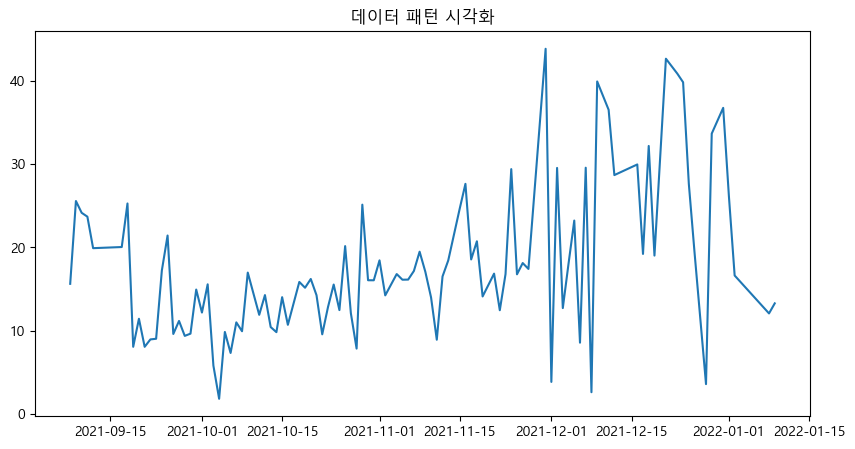

In [272]:
plt.figure(figsize = (10, 5)) # 가로, 세로
plt.plot(a2_rnn)
plt.title("데이터 패턴 시각화")
plt.show()

# Code split

# MinMax

## 0~1

In [273]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

a2_rnn["hotft"] = scaler.fit_transform(a2_rnn)

a2_rnn

,hotft
date,
2021-09-08,0.328462
2021-09-09,0.565012
2021-09-10,0.531384
2021-09-11,0.520299
2021-09-12,0.430315
...,...
2021-12-31,0.831225
2022-01-01,0.578065
2022-01-02,0.352217


# Shift Dataset 4 RNN

- 다음 날(또는 시간 등) 예측을 위해 정답 데이터를 추가
- shift() : 성장 정보 데이터를 위로 한칸씩 밀어 이동

In [274]:
# df 복사
a2_shifted = a2_rnn.copy()
a2_shifted.head()

,hotft
date,
2021-09-08,0.328462
2021-09-09,0.565012
2021-09-10,0.531384
2021-09-11,0.520299
2021-09-12,0.430315


In [302]:
a2_shifted["y_d+1"] = a2_shifted["hotft"].shift(-24, freq="H")
a2_shifted

,hotft,y_d+1,hotft_d-3,hotft_d-2,hotft_d-1,hotft_d-0
date,,,,,,
2021-09-11,0.520299,NaN,0.328462,0.565012,0.531384,0.520299
2021-09-20,0.228616,0.148468,0.433564,0.558007,0.148528,0.228616
2021-09-21,0.148468,0.169619,0.558007,0.148528,0.228616,0.148468
2021-09-22,0.169619,0.171464,0.148528,0.228616,0.148468,0.169619
2021-09-23,0.171464,0.366504,0.228616,0.148468,0.169619,0.171464
2021-09-24,0.366504,0.466429,0.148468,0.169619,0.171464,0.366504
2021-09-25,0.466429,0.185136,0.169619,0.171464,0.366504,0.466429
2021-09-26,0.185136,0.222393,0.171464,0.366504,0.466429,0.185136
2021-09-27,0.222393,0.179679,0.366504,0.466429,0.185136,0.222393


In [276]:
a2_shifted.head(30)

,hotft,y_d+1
date,,
2021-09-08,0.328462,0.565012
2021-09-09,0.565012,0.531384
2021-09-10,0.531384,0.520299
2021-09-11,0.520299,0.430315
2021-09-12,0.430315,NaN
2021-09-17,0.433564,0.558007
2021-09-18,0.558007,0.148528
2021-09-19,0.148528,0.228616
2021-09-20,0.228616,0.148468


In [277]:
a2_shifted.isnull().sum()

hotft     0
y_d+1    15
dtype: int64

In [278]:
a2_shifted.dropna(inplace=True)

# Predict set

- 과거 정보를 바탕으로 어느 기준으로 예측할지 설정
    - 지난 n일을 토대로 예측하기(5시간, 10시간, 7일 등)

In [279]:
# 3일로 설정
# 72시간 shift

In [280]:
a2_shifted["hotft_d-3"] = a2_shifted["hotft"].shift(72, freq="H")
a2_shifted

,hotft,y_d+1,hotft_d-3
date,,,
2021-09-08,0.328462,0.565012,NaN
2021-09-09,0.565012,0.531384,NaN
2021-09-10,0.531384,0.520299,NaN
2021-09-11,0.520299,0.430315,0.328462
2021-09-17,0.433564,0.558007,NaN
...,...,...,...
2021-12-25,0.614300,0.417585,NaN
2021-12-28,0.041882,0.757649,0.614300
2021-12-31,0.831225,0.578065,0.041882


In [281]:
a2_shifted["hotft_d-2"] = a2_shifted["hotft"].shift(48, freq="H")
a2_shifted["hotft_d-1"] = a2_shifted["hotft"].shift(24, freq="H")
a2_shifted["hotft_d-0"] = a2_shifted["hotft"].shift(0, freq="H") # 0은 현재를 의미

a2_shifted

,hotft,y_d+1,hotft_d-3,hotft_d-2,hotft_d-1,hotft_d-0
date,,,,,,
2021-09-08,0.328462,0.565012,NaN,NaN,NaN,0.328462
2021-09-09,0.565012,0.531384,NaN,NaN,0.328462,0.565012
2021-09-10,0.531384,0.520299,NaN,0.328462,0.565012,0.531384
2021-09-11,0.520299,0.430315,0.328462,0.565012,0.531384,0.520299
2021-09-17,0.433564,0.558007,NaN,NaN,NaN,0.433564
...,...,...,...,...,...,...
2021-12-25,0.614300,0.417585,NaN,0.928806,0.904352,0.614300
2021-12-28,0.041882,0.757649,0.614300,NaN,NaN,0.041882
2021-12-31,0.831225,0.578065,0.041882,NaN,NaN,0.831225


In [282]:
a2_shifted.isnull().sum()

hotft         0
y_d+1         0
hotft_d-3    27
hotft_d-2    25
hotft_d-1    14
hotft_d-0     0
dtype: int64

In [283]:
a2_shifted.dropna(inplace=True)

In [284]:
a2_shifted

,hotft,y_d+1,hotft_d-3,hotft_d-2,hotft_d-1,hotft_d-0
date,,,,,,
2021-09-11,0.520299,0.430315,0.328462,0.565012,0.531384,0.520299
2021-09-20,0.228616,0.148468,0.433564,0.558007,0.148528,0.228616
2021-09-21,0.148468,0.169619,0.558007,0.148528,0.228616,0.148468
2021-09-22,0.169619,0.171464,0.148528,0.228616,0.148468,0.169619
2021-09-23,0.171464,0.366504,0.228616,0.148468,0.169619,0.171464
2021-09-24,0.366504,0.466429,0.148468,0.169619,0.171464,0.366504
2021-09-25,0.466429,0.185136,0.169619,0.171464,0.366504,0.466429
2021-09-26,0.185136,0.222393,0.171464,0.366504,0.466429,0.185136
2021-09-27,0.222393,0.179679,0.366504,0.466429,0.185136,0.222393


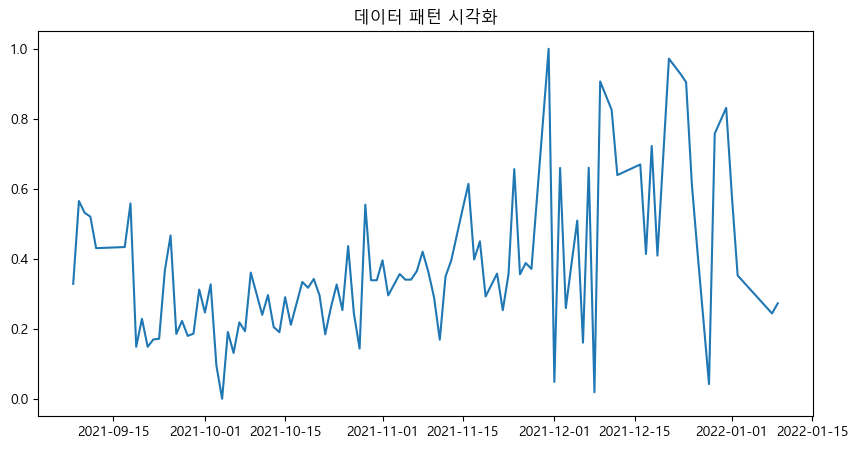

In [285]:
plt.figure(figsize = (10, 5)) # 가로, 세로
plt.plot(a2_rnn)
plt.title("데이터 패턴 시각화")
plt.show()

In [286]:
# 데이터 셋 분리를 위한 날짜 지정

# 예시
# validation_start = "2014-09-01 00:00:00"
# test_start = "2014-11-01 00:00:00"

validation_start = "2021-11-15"
test_start = "2021-12-01"

# 날짜 타입이라 연산 가능
train = a2_shifted[a2_shifted.index < validation_start] # val보다 큰 경우
val = a2_shifted[(a2_shifted.index >= validation_start) &
                     (a2_shifted.index < test_start)]
test = a2_shifted[a2_shifted.index >= test_start] # test보다 작은 경우

train.shape, val.shape, test.shape

((40, 6), (4, 6), (6, 6))

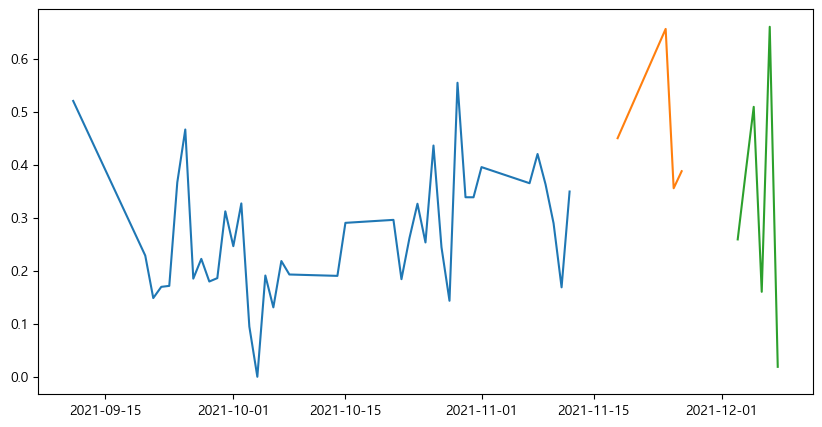

In [287]:
plt.figure(figsize=(10,5))
plt.plot(train["hotft"])
plt.plot(val["hotft"])
plt.plot(test["hotft"])
plt.show()

In [289]:
# 문제와 답
# train.loc[행, 열] 
# loc 없이 하면 컬럼만 색인

X_train = train.loc[:, "hotft_d-3":"hotft_d-0"]
y_train = train["y_d+1"]

X_val = val.loc[:, "hotft_d-3":"hotft_d-0"]
y_val = val["y_d+1"]

X_test = test.loc[:, "hotft_d-3":"hotft_d-0"]
y_test = test["y_d+1"]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(40, 4) (40,)
(4, 4) (4,)
(6, 4) (6,)


In [290]:
# 이 셀을 두 번 실행시키면 values가 없다고 나온다. 그럴 때는 위부터 다시 실행
X_train = X_train.values.reshape(40, 4, 1)
X_val = X_val.values.reshape(4, 4, 1)
X_test = X_test.values.reshape(6, 4, 1)

In [292]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU

# LSTM은 내부 연산이 많이 들어간다
# RNN계열의 GRU를 이용

model = Sequential()

# time_steps는 과거 데이터를 토대로 미래를 맞춘다.
# features는 꽃가지 하나만 쓰므로 1개이다.
model.add(GRU(32, input_shape=(4, 1)))
model.add(Dense(1))

model.compile(loss="mse", optimizer="Adam")

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 362ms/step - loss: 0.0479 - val_loss: 0.0350
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 0.0366 - val_loss: 0.0222
Epoch 3/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0273 - val_loss: 0.0126
Epoch 4/20
2/2 [==============================] - 0s 30ms/step - loss: 0.0204 - val_loss: 0.0062
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.0156 - val_loss: 0.0029
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0130 - val_loss: 0.0022
Epoch 7/20
2/2 [==============================] - 0s 32ms/step - loss: 0.0120 - val_loss: 0.0031
Epoch 8/20
2/2 [==============================] - 0s 31ms/step - loss: 0.0122 - val_loss: 0.0046
Epoch 9/20
2/2 [==============================] - 0s 27ms/step - loss: 0.0131 - val_loss: 0.0059
Epoch 10/20
2/2 [==============================] - 0s 29ms/step - loss: 0.0136 - val_loss: 0.0064
Epoch 11/20
2/2 [===========

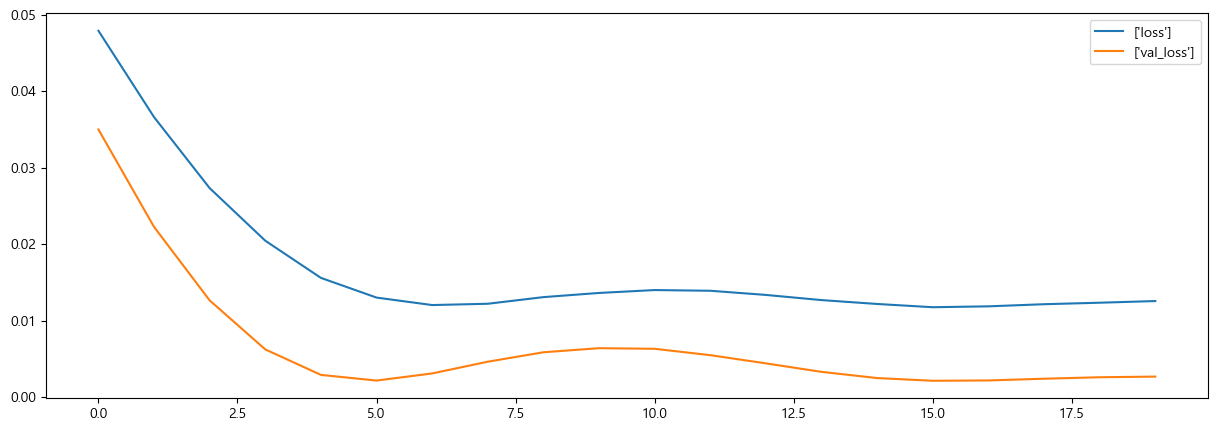

In [293]:
plt.figure(figsize=(15,5))
plt.plot(history.history["loss"], label=["loss"])
plt.plot(history.history["val_loss"], label=["val_loss"])
plt.legend()
plt.show()

In [295]:
result = test[["y_d+1"]]
result

,y_d+1
date,
2021-12-03,0.386077
2021-12-04,0.509193
2021-12-05,0.160262
2021-12-06,0.660196
2021-12-07,0.018757
2021-12-08,0.906678


In [296]:
# 모델이 예측한 결과를 컬럼으로 새로 추가
result["predict"] = model.predict(X_test)
result

1/1 [==============================] - 0s 294ms/step


C:\Users\jhhwa\AppData\Local\Temp\ipykernel_22752\451519117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['predict'] = model.predict(X_test)


,y_d+1,predict
date,,
2021-12-03,0.386077,0.301712
2021-12-04,0.509193,0.285555
2021-12-05,0.160262,0.326571
2021-12-06,0.660196,0.255867
2021-12-07,0.018757,0.337064
2021-12-08,0.906678,0.235232


In [297]:
# scaler 적용 전 원래 단위로 변경
inverse_result = scaler.inverse_transform(result)
inverse_result

array([[18.05102273, 14.4976925 ],
       [23.23647059, 13.81715382],
       [ 8.54      , 15.54471351],
       [29.5965    , 12.5667414 ],
       [ 2.58      , 15.98663399],
       [39.978     , 11.69763875]])

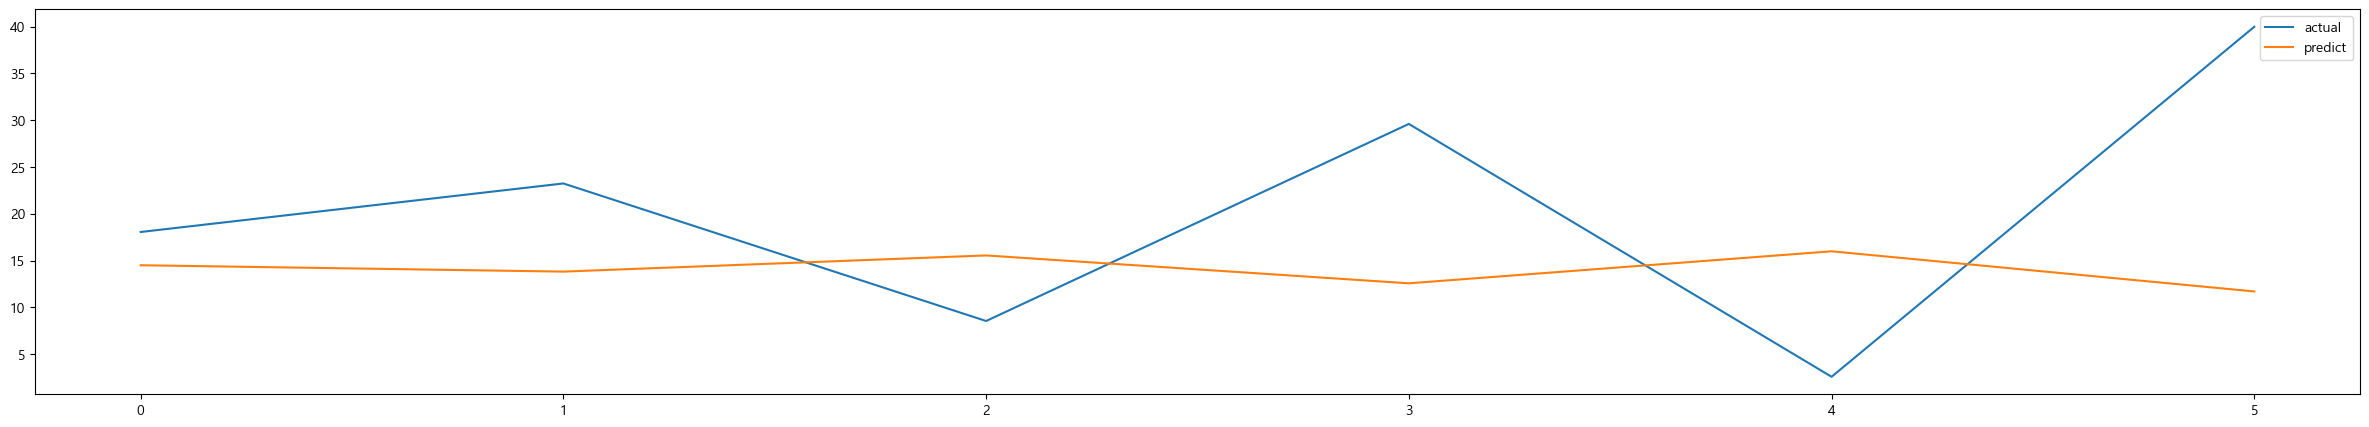

In [301]:
# val값과 test값이 얼마나 비슷하게 그려지는지 확인
plt.figure(figsize=(30,5))
plt.plot(inverse_result[:,0], label="actual")
plt.plot(inverse_result[:,1], label="predict")
plt.legend()
plt.show()